In [ ]:
import pandas as pd
import numpy as np

price_pred = pd.read_csv("/content/Ford Car Price Prediction.csv")

Checking and removing null values.

In [ ]:
price_pred.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,NaN,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,NaN,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,NaN,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,NaN,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,NaN,48.7,1.0
5,Fiesta,2015,10500,Manual,35432,Petrol,NaN,47.9,1.6
6,Puma,2019,22500,Manual,2029,Petrol,NaN,50.4,1.0
7,Fiesta,2017,9000,Manual,13054,Petrol,NaN,54.3,1.2
8,Kuga,2019,25500,Automatic,6894,Diesel,NaN,42.2,2.0
9,Focus,2018,10000,Manual,48141,Petrol,145.0,61.4,1.0


In [ ]:
print(price_pred.shape)
print(price_pred.columns)
print(price_pred.info())

(17966, 9)
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17957 non-null  float64
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 1.2+ MB
None


In [ ]:
price_pred.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,9
mpg,0
engineSize,0


In [ ]:
price_pred.isnull()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
17961,False,False,False,False,False,False,False,False,False
17962,False,False,False,False,False,False,False,False,False
17963,False,False,False,False,False,False,False,False,False
17964,False,False,False,False,False,False,False,False,False


In [ ]:
price_pred = price_pred.dropna()

In [ ]:
price_pred.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


Checking duplicate rows

In [ ]:
price_pred[price_pred.duplicated()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
159,Focus,2016,10995,Manual,30923,Diesel,0.0,74.3,1.5
312,Focus,2019,14998,Manual,7000,Petrol,145.0,58.9,1.0
349,Focus,2019,14998,Manual,7000,Petrol,145.0,58.9,1.0
510,EcoSport,2019,15489,Manual,5636,Diesel,145.0,68.9,1.5
512,Grand Tourneo Connect,2019,19999,Manual,3500,Diesel,145.0,61.4,1.5
...,...,...,...,...,...,...,...,...,...
14556,Mondeo,2015,6793,Manual,138000,Diesel,20.0,68.9,2.0
15121,Kuga,2017,14999,Manual,24877,Diesel,30.0,64.2,1.5
15127,EcoSport,2019,16799,Automatic,433,Petrol,150.0,45.6,1.0
15685,KA,2008,1795,Manual,63000,Petrol,160.0,45.6,1.3


In [ ]:
price_pred.duplicated().sum()

154

In [ ]:
price_pred = price_pred.drop_duplicates()

In [ ]:
price_pred.duplicated().sum()

0

Handling Categorical variable

In [ ]:
a = price_pred.groupby(["model","year"])["price"].mean()
a.sort_values(ascending=True).head(30)

model      year
 Mondeo    2005     881.666667
           2002     895.000000
 KA        2006    1095.000000
 Fiesta    2005    1295.000000
 KA        2008    1363.166667
 Fiesta    2004    1414.666667
 Mondeo    2007    1496.666667
 Fusion    2004    1500.000000
 Focus     2005    1633.000000
 KA        2007    1642.500000
 C-MAX     2006    1775.000000
 Streetka  2006    1850.000000
 Galaxy    2005    1995.000000
 Fiesta    2000    1995.000000
 Streetka  2005    1999.000000
 Fiesta    2007    2033.250000
 Focus     2006    2061.666667
           2003    2063.000000
 Fiesta    2006    2091.000000
 Fusion    2005    2245.000000
           2009    2277.000000
           2007    2299.000000
 C-MAX     2007    2395.000000
 Puma      2002    2445.000000
 Fusion    2006    2495.000000
 Fiesta    2008    2559.157895
 Fusion    2008    2614.666667
 Mondeo    2008    2619.750000
 Focus     2008    2648.200000
 C-MAX     2008    2672.600000
Name: price, dtype: float64

In [ ]:
price_pred = pd.get_dummies(price_pred, columns=['fuelType', 'transmission'])

In [ ]:
price_pred.head(20)

,model,year,price,mileage,tax,mpg,engineSize,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,transmission_Automatic,transmission_Manual,transmission_Semi-Auto
9,Focus,2018,10000,48141,145.0,61.4,1.0,False,False,False,False,True,False,True,False
10,Fiesta,2018,11561,18803,145.0,56.5,1.0,False,False,False,False,True,False,True,False
11,EcoSport,2018,13500,12065,145.0,54.3,1.0,False,False,False,False,True,False,True,False
12,Fiesta,2017,11000,20978,0.0,65.7,1.0,False,False,False,False,True,False,True,False
13,Kuga,2018,17999,9002,145.0,54.3,2.0,True,False,False,False,False,False,False,True
14,Kuga,2018,18999,8970,145.0,58.9,1.5,True,False,False,False,False,False,False,True
15,Kuga,2018,14399,12810,145.0,64.2,1.5,True,False,False,False,False,False,True,False
16,Kuga,2019,17999,10428,145.0,38.2,2.0,True,False,False,False,False,False,True,False
17,Kuga,2018,16899,14680,145.0,54.3,2.0,True,False,False,False,False,False,True,False
18,Fiesta,2017,10999,12427,20.0,62.8,1.0,False,False,False,False,True,False,True,False


In [ ]:
model_avg = price_pred.groupby('model')['price'].mean()
model_position = model_avg.rank(method='dense').astype(int)
model_mapping = model_position.to_dict()
price_pred['model'] = price_pred['model'].map(model_mapping)

In [ ]:
price_pred.head(20)

,model,year,price,mileage,tax,mpg,engineSize,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,transmission_Automatic,transmission_Manual,transmission_Semi-Auto
9,14,2018,10000,48141,145.0,61.4,1.0,False,False,False,False,True,False,True,False
10,9,2018,11561,18803,145.0,56.5,1.0,False,False,False,False,True,False,True,False
11,13,2018,13500,12065,145.0,54.3,1.0,False,False,False,False,True,False,True,False
12,9,2017,11000,20978,0.0,65.7,1.0,False,False,False,False,True,False,True,False
13,18,2018,17999,9002,145.0,54.3,2.0,True,False,False,False,False,False,False,True
14,18,2018,18999,8970,145.0,58.9,1.5,True,False,False,False,False,False,False,True
15,18,2018,14399,12810,145.0,64.2,1.5,True,False,False,False,False,False,True,False
16,18,2019,17999,10428,145.0,38.2,2.0,True,False,False,False,False,False,True,False
17,18,2018,16899,14680,145.0,54.3,2.0,True,False,False,False,False,False,True,False
18,9,2017,10999,12427,20.0,62.8,1.0,False,False,False,False,True,False,True,False


In [ ]:
price_pred = price_pred.astype(int)
price_pred.head(20)

,model,year,price,mileage,tax,mpg,engineSize,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,transmission_Automatic,transmission_Manual,transmission_Semi-Auto
9,14,2018,10000,48141,145,61,1,0,0,0,0,1,0,1,0
10,9,2018,11561,18803,145,56,1,0,0,0,0,1,0,1,0
11,13,2018,13500,12065,145,54,1,0,0,0,0,1,0,1,0
12,9,2017,11000,20978,0,65,1,0,0,0,0,1,0,1,0
13,18,2018,17999,9002,145,54,2,1,0,0,0,0,0,0,1
14,18,2018,18999,8970,145,58,1,1,0,0,0,0,0,0,1
15,18,2018,14399,12810,145,64,1,1,0,0,0,0,0,1,0
16,18,2019,17999,10428,145,38,2,1,0,0,0,0,0,1,0
17,18,2018,16899,14680,145,54,2,1,0,0,0,0,0,1,0
18,9,2017,10999,12427,20,62,1,0,0,0,0,1,0,1,0


Feature Scaling

In [ ]:
price_pred.describe()

,model,year,price,mileage,tax,mpg,engineSize,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,transmission_Automatic,transmission_Manual,transmission_Semi-Auto
count,17803.000000,17803.000000,17803.000000,17803.000000,17803.000000,17803.000000,17803.000000,17803.000000,17803.000000,17803.000000,17803.000000,17803.000000,17803.000000,17803.000000,17803.000000
mean,12.143234,2016.861933,12267.867045,23386.965399,113.298152,57.432118,1.197102,0.320452,0.000112,0.001236,0.000056,0.678144,0.075886,0.863731,0.060383
std,4.029096,2.052242,4735.451913,19421.018522,62.045725,10.132308,0.440950,0.466663,0.010599,0.035132,0.007495,0.467201,0.264823,0.343084,0.238202
min,1.000000,1996.000000,495.000000,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,2016.000000,8999.000000,10000.000000,30.000000,52.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,13.000000,2017.000000,11280.000000,18291.000000,145.000000,58.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,14.000000,2018.000000,15295.000000,31100.000000,145.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,24.000000,2060.000000,54995.000000,177644.000000,580.000000,201.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

features_to_scale = ['year','price', 'mileage', 'tax', 'mpg']
scaler = StandardScaler()
price_pred[features_to_scale] = scaler.fit_transform(price_pred[features_to_scale])
print(price_pred.head(20))

    model      year     price   mileage       tax       mpg  engineSize  \
9      14  0.554564 -0.478926  1.274636  0.510958  0.352139           1   
10      9  0.554564 -0.149275 -0.236038  0.510958 -0.141346           1   
11     13  0.554564  0.260201 -0.582991  0.510958 -0.338740           1   
12      9  0.067278 -0.267747 -0.124043 -1.826094  0.746927           1   
13     18  0.554564  1.210295 -0.740711  0.510958 -0.338740           2   
14     18  0.554564  1.421474 -0.742359  0.510958  0.056048           1   
15     18  0.554564  0.450051 -0.544630  0.510958  0.648230           1   
16     18  1.041849  1.210295 -0.667284  0.510958 -1.917891           2   
17     18  0.554564  0.977998 -0.448340  0.510958 -0.338740           2   
18      9  0.067278 -0.267958 -0.564351 -1.503742  0.450836           1   
19      9  1.041849  0.049022  0.109886  0.510958 -0.240043           1   
20      9  0.554564 -0.584727 -0.153805  0.510958 -0.240043           1   
21      9  0.067278 -0.37

Dropping columns based on correlation

In [ ]:
price_pred_corr = price_pred.corr()

<Axes: >

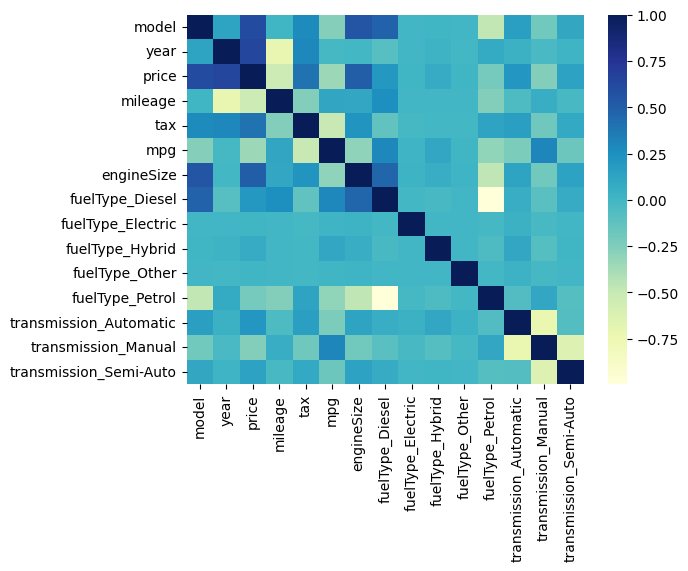

In [ ]:
import seaborn as sns

sns.heatmap(price_pred_corr, cmap = 'YlGnBu')

In [ ]:
least_correlated = price_pred_corr["price"].abs().sort_values()[:2]
price_pred.drop(least_correlated.index, axis=1, inplace=True)


In [ ]:
price_pred.head(10)

,model,year,price,mileage,tax,mpg,engineSize,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol,transmission_Automatic,transmission_Manual,transmission_Semi-Auto
9,14,0.554564,-0.478926,1.274636,0.510958,0.352139,1,0,0,1,0,1,0
10,9,0.554564,-0.149275,-0.236038,0.510958,-0.141346,1,0,0,1,0,1,0
11,13,0.554564,0.260201,-0.582991,0.510958,-0.338740,1,0,0,1,0,1,0
12,9,0.067278,-0.267747,-0.124043,-1.826094,0.746927,1,0,0,1,0,1,0
13,18,0.554564,1.210295,-0.740711,0.510958,-0.338740,2,1,0,0,0,0,1
14,18,0.554564,1.421474,-0.742359,0.510958,0.056048,1,1,0,0,0,0,1
15,18,0.554564,0.450051,-0.544630,0.510958,0.648230,1,1,0,0,0,1,0
16,18,1.041849,1.210295,-0.667284,0.510958,-1.917891,2,1,0,0,0,1,0
17,18,0.554564,0.977998,-0.448340,0.510958,-0.338740,2,1,0,0,0,1,0
18,9,0.067278,-0.267958,-0.564351,-1.503742,0.450836,1,0,0,1,0,1,0
